In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist
x_train,y_train=x_train_full[:-5000],y_train_full[:-5000]
x_valid,y_valid=x_train_full[-5000:],y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(55000, 28, 28)

In [4]:
x_train.dtype

dtype('uint8')

In [6]:
x_train,x_valid,x_test=x_train/255.,x_valid/255.,x_test/255.

In [12]:
y_train[0]

9

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

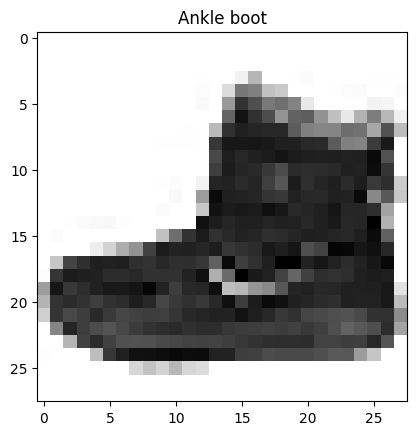

In [14]:
plt.imshow(x_train[0],cmap='binary')
plt.title(class_names[y_train[0]])

In [15]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [18]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 6ms/step - loss: 9.0030 - accuracy: 0.1121 - val_loss: 9.6201 - val_accuracy: 0.1042
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 9.6726 - accuracy: 0.0996 - val_loss: 9.6201 - val_accuracy: 0.1042
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 9.6729 - accuracy: 0.0996 - val_loss: 9.6201 - val_accuracy: 0.1042
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 9.6729 - accuracy: 0.0996 - val_loss: 9.6201 - val_accuracy: 0.1042
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 9.6729 - accuracy: 0.0996 - val_loss: 9.6201 - val_accuracy: 0.1042
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 9.6729 - accuracy: 0.0996 - val_loss: 9.6201 - val_accuracy: 0.1042
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 9.6729 - accuracy: 0.0996 - val_loss: 9.6201 - val_accurac

<Axes: xlabel='Epoch'>

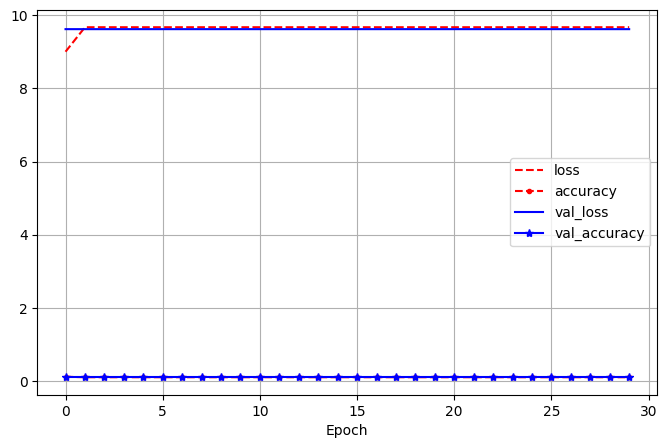

In [19]:
pd.DataFrame(history.history).plot(grid=True,xlabel='Epoch',figsize=(8,5),style=['r--','r--.','b-','b-*'])